Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
%matplotlib inline

C:\Users\Kenin\AppData\Local\Temp\ipykernel_8120\3633713768.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Display all rows/columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Import files

In [3]:
pwd = os.getcwd()
filepath = pwd + '\\nfl_afc_stats.xlsx'
filepath2 = pwd + '\\nfl_nfc_stats.xlsx'
filepath3 = pwd + '\\nfl_defense_stats.xlsx'
filepath4 = pwd + '\\nfl_kick_punt_returns.xlsx'
filepath5 = pwd + '\\nfl_kicking_stats.xlsx'
filepath6 = pwd + '\\nfl_offense_stats.xlsx'

Data Cleaning and Preprocessing

In [4]:
afc_df = pd.read_excel(filepath)
afc_df

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills*,11,6,0.647,451,311,140,8.2,-1.8,6.5,4.1,2.3
1,Miami Dolphins+,11,6,0.647,496,391,105,6.2,-1.8,4.4,7.6,-3.1
2,New York Jets,7,10,0.412,268,355,-87,-5.1,-0.6,-5.8,-6.7,0.9
3,New England Patriots,4,13,0.235,236,366,-130,-7.6,-0.2,-7.9,-8.5,0.6
4,Baltimore Ravens*,13,4,0.765,483,280,203,11.9,1.2,13.2,6.7,6.5
5,Cleveland Browns+,11,6,0.647,396,362,34,2.0,1.3,3.3,2.4,0.9
6,Pittsburgh Steelers+,10,7,0.588,304,324,-20,-1.2,1.9,0.7,-3.0,3.7
7,Cincinnati Bengals,9,8,0.529,366,384,-18,-1.1,2.8,1.7,1.3,0.4
8,Houston Texans*,10,7,0.588,377,353,24,1.4,-1.0,0.4,0.3,0.1
9,Jacksonville Jaguars,9,8,0.529,377,371,6,0.4,1.1,1.4,1.3,0.1


In [5]:
nfc_df = pd.read_excel(filepath2)
nfc_df

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Dallas Cowboys*,12,5,0.706,509,315,194,11.4,-2.2,9.2,6.5,2.7
1,Philadelphia Eagles+,11,6,0.647,433,428,5,0.3,-0.4,-0.1,3.6,-3.7
2,New York Giants,6,11,0.353,266,407,-141,-8.3,0.4,-7.9,-6.9,-1.0
3,Washington Commanders,4,13,0.235,329,518,-189,-11.1,0.0,-11.1,-2.8,-8.4
4,Detroit Lions*,12,5,0.706,461,395,66,3.9,0.4,4.3,6.0,-1.8
5,Green Bay Packers+,9,8,0.529,383,350,33,1.9,-0.8,1.2,0.9,0.2
6,Minnesota Vikings,7,10,0.412,344,362,-18,-1.1,0.5,-0.6,-1.6,1.0
7,Chicago Bears,7,10,0.412,360,379,-19,-1.1,-0.9,-2.0,-1.2,-0.9
8,Tampa Bay Buccaneers*,9,8,0.529,348,325,23,1.4,-0.3,1.1,-1.6,2.7
9,New Orleans Saints,9,8,0.529,402,327,75,4.4,-2.2,2.2,1.7,0.5


In [6]:
#Join AFC and NFC dataframes
#Rename columns and convert dtypes

teams_df = pd.concat([afc_df,nfc_df]).reset_index().drop(columns=['index'])
teams_df.rename(columns={'Tm':'Team'}, inplace=True)
teams_df['Team'] = teams_df['Team'].astype('string').str.replace(r"\W"," ", regex=True).str.strip()
teams_df

,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills,11,6,0.647,451,311,140,8.2,-1.8,6.5,4.1,2.3
1,Miami Dolphins,11,6,0.647,496,391,105,6.2,-1.8,4.4,7.6,-3.1
2,New York Jets,7,10,0.412,268,355,-87,-5.1,-0.6,-5.8,-6.7,0.9
3,New England Patriots,4,13,0.235,236,366,-130,-7.6,-0.2,-7.9,-8.5,0.6
4,Baltimore Ravens,13,4,0.765,483,280,203,11.9,1.2,13.2,6.7,6.5
5,Cleveland Browns,11,6,0.647,396,362,34,2.0,1.3,3.3,2.4,0.9
6,Pittsburgh Steelers,10,7,0.588,304,324,-20,-1.2,1.9,0.7,-3.0,3.7
7,Cincinnati Bengals,9,8,0.529,366,384,-18,-1.1,2.8,1.7,1.3,0.4
8,Houston Texans,10,7,0.588,377,353,24,1.4,-1.0,0.4,0.3,0.1
9,Jacksonville Jaguars,9,8,0.529,377,371,6,0.4,1.1,1.4,1.3,0.1


In [7]:
teams_df.dtypes

Team    string[python]
W                int64
L                int64
W-L%           float64
PF               int64
PA               int64
PD               int64
MoV            float64
SoS            float64
SRS            float64
OSRS           float64
DSRS           float64
dtype: object

In [8]:
defense_df = pd.read_excel(filepath3, header=1)
defense_df

,Rk,Tm,G,PA,Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,Yds.1,TD,Int,NY/A,1stD.1,Att.1,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,1.0,Baltimore Ravens,17.0,280.0,5123.0,1109.0,4.6,31.0,13.0,306.0,384.0,634.0,3263.0,18.0,18.0,4.7,175.0,415.0,1860.0,6.0,4.5,96.0,106.0,841.0,35.0,28.7,14.4,113.76
1,2.0,Kansas City Chiefs,17.0,294.0,4926.0,1045.0,4.7,17.0,9.0,300.0,340.0,556.0,3001.0,19.0,8.0,4.9,169.0,432.0,1925.0,10.0,4.5,107.0,73.0,604.0,24.0,28.5,9.5,35.54
2,3.0,San Francisco 49ers,17.0,298.0,5167.0,1038.0,5.0,28.0,6.0,319.0,410.0,621.0,3642.0,20.0,22.0,5.4,190.0,369.0,1525.0,10.0,4.1,97.0,94.0,762.0,32.0,33.9,15.5,-7.76
3,4.0,Buffalo Bills,17.0,311.0,5222.0,1015.0,5.1,30.0,12.0,313.0,363.0,552.0,3342.0,18.0,18.0,5.5,183.0,409.0,1880.0,14.0,4.6,96.0,99.0,753.0,34.0,32.0,16.0,5.71
4,5.0,Dallas Cowboys,17.0,315.0,5095.0,1014.0,5.0,26.0,9.0,311.0,308.0,509.0,3185.0,21.0,17.0,5.7,166.0,459.0,1910.0,14.0,4.2,108.0,104.0,934.0,37.0,32.0,14.6,4.29
5,6.0,Pittsburgh Steelers,17.0,324.0,5816.0,1074.0,5.4,27.0,11.0,311.0,348.0,573.0,3860.0,23.0,16.0,6.2,186.0,454.0,1956.0,9.0,4.3,95.0,90.0,741.0,30.0,33.7,14.2,-3.91
6,7.0,Tampa Bay Buccaneers,17.0,325.0,5852.0,1081.0,5.4,26.0,13.0,337.0,404.0,611.0,4232.0,23.0,13.0,6.4,213.0,422.0,1620.0,11.0,3.8,101.0,93.0,762.0,23.0,34.4,14.2,-29.99
7,8.0,New Orleans Saints,17.0,327.0,5562.0,1054.0,5.3,29.0,11.0,300.0,333.0,558.0,3524.0,22.0,18.0,6.0,167.0,462.0,2038.0,10.0,4.4,100.0,102.0,775.0,33.0,31.6,14.3,35.39
8,9.0,Las Vegas Raiders,17.0,331.0,5625.0,1089.0,5.2,22.0,9.0,330.0,376.0,564.0,3610.0,21.0,13.0,5.9,187.0,479.0,2015.0,15.0,4.2,117.0,96.0,861.0,26.0,33.0,11.4,-22.59
9,10.0,Green Bay Packers,17.0,350.0,5696.0,1061.0,5.4,18.0,11.0,340.0,342.0,523.0,3515.0,21.0,7.0,6.2,189.0,493.0,2181.0,15.0,4.4,120.0,95.0,907.0,31.0,38.7,9.8,-84.90


In [9]:
defense_df.columns

Index(['Rk', 'Tm', 'G', 'PA', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp',
       'Att', 'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1',
       'Y/A', '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP'],
      dtype='object')

In [10]:
#Rename columns
defense_df.rename(columns={'Pen':'Def Pen','Rk':'Def Rank','Tm':'Team','Yds':'Yds Allowed','Ply':'Tot Def Plys','Y/P':'Def Y/P','TO':'Takeaways','FL':'Fumble Rec','1stD':'Tot 1stD Allowed','Cmp':'Def Pass Cmp','Att':'Def Pass Att','Yds.1':'Pass Yds Allowed','TD':'Pass TD Allowed','Int':'Def Int','NY/A':'Def Pass NY/A','1stD.1':'Pass 1stD Allowed','Att.1':'Def Rush Att','Yds.2':'Rush Yds Allowed','TD.1':'Rush TD Allowed','Y/A':'Def Rush Y/A','1stD.2':'Rush 1stD Allowed','Yds.3':'Pen Yds','1stPy':'Def 1stDPy','Sc%':'Def Sc%','TO%':'Def TO%','EXP':'Def EXP'}, inplace=True)
defense_df = defense_df[:32]
defense_df

,Def Rank,Team,G,PA,Yds Allowed,Tot Def Plys,Def Y/P,Takeaways,Fumble Rec,Tot 1stD Allowed,Def Pass Cmp,Def Pass Att,Pass Yds Allowed,Pass TD Allowed,Def Int,Def Pass NY/A,Pass 1stD Allowed,Def Rush Att,Rush Yds Allowed,Rush TD Allowed,Def Rush Y/A,Rush 1stD Allowed,Def Pen,Pen Yds,Def 1stDPy,Def Sc%,Def TO%,Def EXP
0,1.0,Baltimore Ravens,17.0,280.0,5123.0,1109.0,4.6,31.0,13.0,306.0,384.0,634.0,3263.0,18.0,18.0,4.7,175.0,415.0,1860.0,6.0,4.5,96.0,106.0,841.0,35.0,28.7,14.4,113.76
1,2.0,Kansas City Chiefs,17.0,294.0,4926.0,1045.0,4.7,17.0,9.0,300.0,340.0,556.0,3001.0,19.0,8.0,4.9,169.0,432.0,1925.0,10.0,4.5,107.0,73.0,604.0,24.0,28.5,9.5,35.54
2,3.0,San Francisco 49ers,17.0,298.0,5167.0,1038.0,5.0,28.0,6.0,319.0,410.0,621.0,3642.0,20.0,22.0,5.4,190.0,369.0,1525.0,10.0,4.1,97.0,94.0,762.0,32.0,33.9,15.5,-7.76
3,4.0,Buffalo Bills,17.0,311.0,5222.0,1015.0,5.1,30.0,12.0,313.0,363.0,552.0,3342.0,18.0,18.0,5.5,183.0,409.0,1880.0,14.0,4.6,96.0,99.0,753.0,34.0,32.0,16.0,5.71
4,5.0,Dallas Cowboys,17.0,315.0,5095.0,1014.0,5.0,26.0,9.0,311.0,308.0,509.0,3185.0,21.0,17.0,5.7,166.0,459.0,1910.0,14.0,4.2,108.0,104.0,934.0,37.0,32.0,14.6,4.29
5,6.0,Pittsburgh Steelers,17.0,324.0,5816.0,1074.0,5.4,27.0,11.0,311.0,348.0,573.0,3860.0,23.0,16.0,6.2,186.0,454.0,1956.0,9.0,4.3,95.0,90.0,741.0,30.0,33.7,14.2,-3.91
6,7.0,Tampa Bay Buccaneers,17.0,325.0,5852.0,1081.0,5.4,26.0,13.0,337.0,404.0,611.0,4232.0,23.0,13.0,6.4,213.0,422.0,1620.0,11.0,3.8,101.0,93.0,762.0,23.0,34.4,14.2,-29.99
7,8.0,New Orleans Saints,17.0,327.0,5562.0,1054.0,5.3,29.0,11.0,300.0,333.0,558.0,3524.0,22.0,18.0,6.0,167.0,462.0,2038.0,10.0,4.4,100.0,102.0,775.0,33.0,31.6,14.3,35.39
8,9.0,Las Vegas Raiders,17.0,331.0,5625.0,1089.0,5.2,22.0,9.0,330.0,376.0,564.0,3610.0,21.0,13.0,5.9,187.0,479.0,2015.0,15.0,4.2,117.0,96.0,861.0,26.0,33.0,11.4,-22.59
9,10.0,Green Bay Packers,17.0,350.0,5696.0,1061.0,5.4,18.0,11.0,340.0,342.0,523.0,3515.0,21.0,7.0,6.2,189.0,493.0,2181.0,15.0,4.4,120.0,95.0,907.0,31.0,38.7,9.8,-84.90


In [11]:
defense_df.dtypes

Def Rank             float64
Team                  object
G                    float64
PA                   float64
Yds Allowed          float64
Tot Def Plys         float64
Def Y/P              float64
Takeaways            float64
Fumble Rec           float64
Tot 1stD Allowed     float64
Def Pass Cmp         float64
Def Pass Att         float64
Pass Yds Allowed     float64
Pass TD Allowed      float64
Def Int              float64
Def Pass NY/A        float64
Pass 1stD Allowed    float64
Def Rush Att         float64
Rush Yds Allowed     float64
Rush TD Allowed      float64
Def Rush Y/A         float64
Rush 1stD Allowed    float64
Def Pen              float64
Pen Yds              float64
Def 1stDPy           float64
Def Sc%              float64
Def TO%              float64
Def EXP              float64
dtype: object

In [12]:
#Convert dtypes
defense_df[['Def Rank', 'G', 'PA', 'Yds Allowed', 'Tot Def Plys',
       'Takeaways', 'Fumble Rec', 'Tot 1stD Allowed', 'Def Pass Cmp',
       'Def Pass Att', 'Pass Yds Allowed', 'Pass TD Allowed', 'Def Int',
       'Pass 1stD Allowed', 'Rush Yds Allowed',
       'Rush TD Allowed', 'Def Rush Y/A', 'Rush 1stD Allowed', 'Def Pen',
       'Pen Yds', 'Def 1stDPy','Def Rush Att']] = defense_df[['Def Rank', 'G', 'PA', 'Yds Allowed', 'Tot Def Plys',
       'Takeaways', 'Fumble Rec', 'Tot 1stD Allowed', 'Def Pass Cmp',
       'Def Pass Att', 'Pass Yds Allowed', 'Pass TD Allowed', 'Def Int',
       'Pass 1stD Allowed', 'Rush Yds Allowed',
       'Rush TD Allowed', 'Def Rush Y/A', 'Rush 1stD Allowed', 'Def Pen',
       'Pen Yds', 'Def 1stDPy','Def Rush Att']].astype('int64')
defense_df['Team'] = defense_df['Team'].astype('string')


C:\Users\Kenin\AppData\Local\Temp\ipykernel_8120\2645066261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense_df[['Def Rank', 'G', 'PA', 'Yds Allowed', 'Tot Def Plys',
C:\Users\Kenin\AppData\Local\Temp\ipykernel_8120\2645066261.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense_df['Team'] = defense_df['Team'].astype('string')


In [13]:
offense_df = pd.read_excel(filepath6, header=1)
offense_df = offense_df[:32]
offense_df

,Rk,Tm,G,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,Yds.1,TD,Int,NY/A,1stD.1,Att.1,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,1.0,Dallas Cowboys,17.0,509.0,6317.0,1122.0,5.6,16.0,6.0,385.0,428.0,614.0,4397.0,36.0,10.0,6.7,229.0,468.0,1920.0,14.0,4.1,113.0,115.0,964.0,43.0,50.3,8.9,192.72
1,2.0,Miami Dolphins,17.0,496.0,6822.0,1053.0,6.5,25.0,10.0,360.0,393.0,566.0,4514.0,30.0,15.0,7.6,223.0,456.0,2308.0,27.0,5.1,113.0,97.0,767.0,24.0,43.5,13.4,128.90
2,3.0,San Francisco 49ers,17.0,491.0,6773.0,1024.0,6.6,18.0,6.0,383.0,336.0,491.0,4384.0,33.0,12.0,8.4,207.0,499.0,2389.0,27.0,4.8,147.0,101.0,933.0,29.0,45.3,10.1,268.60
3,4.0,Baltimore Ravens,17.0,483.0,6296.0,1076.0,5.9,19.0,12.0,360.0,328.0,494.0,3635.0,27.0,7.0,6.8,180.0,541.0,2661.0,26.0,4.9,145.0,102.0,955.0,35.0,43.1,9.6,138.81
4,5.0,Detroit Lions,17.0,461.0,6712.0,1137.0,5.9,23.0,11.0,375.0,408.0,606.0,4401.0,30.0,12.0,6.9,228.0,500.0,2311.0,27.0,4.6,124.0,97.0,843.0,23.0,40.6,11.8,191.13
5,6.0,Buffalo Bills,17.0,451.0,6366.0,1115.0,5.7,28.0,10.0,381.0,385.0,579.0,4154.0,29.0,18.0,6.9,199.0,512.0,2212.0,22.0,4.3,158.0,106.0,883.0,24.0,41.4,14.9,197.57
6,7.0,Philadelphia Eagles,17.0,433.0,6024.0,1112.0,5.4,28.0,12.0,377.0,369.0,563.0,3834.0,24.0,16.0,6.4,197.0,510.0,2190.0,22.0,4.3,149.0,95.0,785.0,31.0,42.9,15.3,100.97
7,8.0,Los Angeles Rams,17.0,404.0,6108.0,1094.0,5.6,18.0,5.0,351.0,361.0,583.0,4063.0,26.0,13.0,6.6,206.0,477.0,2045.0,18.0,4.3,110.0,89.0,720.0,35.0,41.1,9.2,133.32
8,9.0,New Orleans Saints,17.0,402.0,5732.0,1121.0,5.1,18.0,7.0,337.0,406.0,606.0,3990.0,28.0,11.0,6.2,199.0,480.0,1742.0,13.0,3.6,112.0,96.0,846.0,26.0,36.6,8.2,46.88
9,10.0,Indianapolis Colts,17.0,396.0,5725.0,1094.0,5.2,22.0,12.0,324.0,355.0,574.0,3666.0,18.0,10.0,6.0,178.0,479.0,2059.0,19.0,4.3,113.0,95.0,685.0,33.0,35.7,9.2,30.12


In [14]:
offense_df.columns

Index(['Rk', 'Tm', 'G', 'PF', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp',
       'Att', 'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1',
       'Y/A', '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP'],
      dtype='object')

In [15]:
#Rename columns
offense_df.rename(columns={'Pen':'Off Pen','Rk':'Off Rank','Tm':'Team','Yds':'Yds Gained','Ply':'Tot Off Plys','Y/P':'Off Y/P','TO':'Turnovers','FL':'Fumbles','1stD':'Tot 1stD Gained','Cmp':'Off Pass Cmp','Att':'Off Pass Att','Yds.1':'Pass Yds Gained','TD':'Pass TD','Int':'Off Int','NY/A':'Off Pass NY/A','1stD.1':'Pass 1stD','Att.1':'Off Rush Att','Yds.2':'Rush Yds','TD.1':'Rush TD','Y/A':'Off Rush Y/A','1stD.2':'Rush 1stD','Yds.3':'Off Pen Yds','1stPy':'Off 1stDPy','Sc%':'Off Sc%','TO%':'Off TO%','EXP':'Off EXP'}, inplace=True)
offense_df

,Off Rank,Team,G,PF,Yds Gained,Tot Off Plys,Off Y/P,Turnovers,Fumbles,Tot 1stD Gained,Off Pass Cmp,Off Pass Att,Pass Yds Gained,Pass TD,Off Int,Off Pass NY/A,Pass 1stD,Off Rush Att,Rush Yds,Rush TD,Off Rush Y/A,Rush 1stD,Off Pen,Off Pen Yds,Off 1stDPy,Off Sc%,Off TO%,Off EXP
0,1.0,Dallas Cowboys,17.0,509.0,6317.0,1122.0,5.6,16.0,6.0,385.0,428.0,614.0,4397.0,36.0,10.0,6.7,229.0,468.0,1920.0,14.0,4.1,113.0,115.0,964.0,43.0,50.3,8.9,192.72
1,2.0,Miami Dolphins,17.0,496.0,6822.0,1053.0,6.5,25.0,10.0,360.0,393.0,566.0,4514.0,30.0,15.0,7.6,223.0,456.0,2308.0,27.0,5.1,113.0,97.0,767.0,24.0,43.5,13.4,128.90
2,3.0,San Francisco 49ers,17.0,491.0,6773.0,1024.0,6.6,18.0,6.0,383.0,336.0,491.0,4384.0,33.0,12.0,8.4,207.0,499.0,2389.0,27.0,4.8,147.0,101.0,933.0,29.0,45.3,10.1,268.60
3,4.0,Baltimore Ravens,17.0,483.0,6296.0,1076.0,5.9,19.0,12.0,360.0,328.0,494.0,3635.0,27.0,7.0,6.8,180.0,541.0,2661.0,26.0,4.9,145.0,102.0,955.0,35.0,43.1,9.6,138.81
4,5.0,Detroit Lions,17.0,461.0,6712.0,1137.0,5.9,23.0,11.0,375.0,408.0,606.0,4401.0,30.0,12.0,6.9,228.0,500.0,2311.0,27.0,4.6,124.0,97.0,843.0,23.0,40.6,11.8,191.13
5,6.0,Buffalo Bills,17.0,451.0,6366.0,1115.0,5.7,28.0,10.0,381.0,385.0,579.0,4154.0,29.0,18.0,6.9,199.0,512.0,2212.0,22.0,4.3,158.0,106.0,883.0,24.0,41.4,14.9,197.57
6,7.0,Philadelphia Eagles,17.0,433.0,6024.0,1112.0,5.4,28.0,12.0,377.0,369.0,563.0,3834.0,24.0,16.0,6.4,197.0,510.0,2190.0,22.0,4.3,149.0,95.0,785.0,31.0,42.9,15.3,100.97
7,8.0,Los Angeles Rams,17.0,404.0,6108.0,1094.0,5.6,18.0,5.0,351.0,361.0,583.0,4063.0,26.0,13.0,6.6,206.0,477.0,2045.0,18.0,4.3,110.0,89.0,720.0,35.0,41.1,9.2,133.32
8,9.0,New Orleans Saints,17.0,402.0,5732.0,1121.0,5.1,18.0,7.0,337.0,406.0,606.0,3990.0,28.0,11.0,6.2,199.0,480.0,1742.0,13.0,3.6,112.0,96.0,846.0,26.0,36.6,8.2,46.88
9,10.0,Indianapolis Colts,17.0,396.0,5725.0,1094.0,5.2,22.0,12.0,324.0,355.0,574.0,3666.0,18.0,10.0,6.0,178.0,479.0,2059.0,19.0,4.3,113.0,95.0,685.0,33.0,35.7,9.2,30.12


In [16]:
#Convert dtypes
offense_df[['Off Rank', 'G', 'PF', 'Yds Gained', 'Tot Off Plys',
       'Turnovers', 'Fumbles', 'Tot 1stD Gained', 'Off Pass Cmp',
       'Off Pass Att', 'Pass Yds Gained', 'Pass TD', 'Off Int', 'Pass 1stD', 'Off Rush Att', 'Rush Yds', 'Rush TD', 'Rush 1stD', 'Off Pen', 'Off Pen Yds', 'Off 1stDPy',
       ]] = offense_df[['Off Rank', 'G', 'PF', 'Yds Gained', 'Tot Off Plys',
       'Turnovers', 'Fumbles', 'Tot 1stD Gained', 'Off Pass Cmp',
       'Off Pass Att', 'Pass Yds Gained', 'Pass TD', 'Off Int', 'Pass 1stD', 'Off Rush Att', 'Rush Yds', 'Rush TD', 'Rush 1stD', 'Off Pen', 'Off Pen Yds', 'Off 1stDPy',
       ]] .astype('int64')
offense_df['Team'] = offense_df['Team'].astype('string')
offense_df.dtypes

Off Rank                    int64
Team               string[python]
G                           int64
PF                          int64
Yds Gained                  int64
Tot Off Plys                int64
Off Y/P                   float64
Turnovers                   int64
Fumbles                     int64
Tot 1stD Gained             int64
Off Pass Cmp                int64
Off Pass Att                int64
Pass Yds Gained             int64
Pass TD                     int64
Off Int                     int64
Off Pass NY/A             float64
Pass 1stD                   int64
Off Rush Att                int64
Rush Yds                    int64
Rush TD                     int64
Off Rush Y/A              float64
Rush 1stD                   int64
Off Pen                     int64
Off Pen Yds                 int64
Off 1stDPy                  int64
Off Sc%                   float64
Off TO%                   float64
Off EXP                   float64
dtype: object

In [17]:
kicking_df = pd.read_excel(filepath5, header=1)
kicking_df = kicking_df[:32]
kicking_df

,Rk,Tm,G,FGA,FGM,FGA.1,FGM.1,FGA.2,FGM.2,FGA.3,FGM.3,FGA.4,FGM.4,FGA.5,FGM.5,Lng,FG%,XPA,XPM,XP%,KO,KOYds,TB,TB%,KOAvg
0,1.0,Dallas Cowboys,17.0,NaN,NaN,9.0,9.0,15.0,13.0,4.0,4.0,10.0,10.0,38.0,36.0,60.0,0.947,52.0,49.0,0.942,109.0,7068.0,99.0,0.908,64.8
1,2.0,Baltimore Ravens,17.0,NaN,NaN,10.0,10.0,10.0,10.0,12.0,11.0,5.0,1.0,37.0,32.0,50.0,0.865,52.0,51.0,0.981,104.0,6638.0,80.0,0.769,63.8
2,3.0,Miami Dolphins,17.0,NaN,NaN,6.0,6.0,7.0,7.0,8.0,6.0,7.0,5.0,28.0,24.0,57.0,0.857,59.0,58.0,0.983,98.0,6327.0,83.0,0.847,64.6
3,4.0,San Francisco 49ers,17.0,NaN,NaN,7.0,7.0,9.0,8.0,6.0,4.0,3.0,2.0,25.0,21.0,57.0,0.840,61.0,60.0,0.984,97.0,6131.0,58.0,0.598,63.2
4,5.0,Los Angeles Rams,17.0,NaN,NaN,11.0,11.0,7.0,7.0,15.0,9.0,10.0,5.0,43.0,32.0,54.0,0.744,37.0,32.0,0.865,92.0,5865.0,80.0,0.870,63.8
5,6.0,Buffalo Bills,17.0,NaN,NaN,4.0,4.0,13.0,12.0,6.0,4.0,6.0,4.0,29.0,24.0,54.0,0.828,50.0,49.0,0.980,95.0,5952.0,53.0,0.558,62.7
6,7.0,Philadelphia Eagles,17.0,NaN,NaN,9.0,9.0,8.0,7.0,7.0,7.0,8.0,7.0,32.0,30.0,61.0,0.938,46.0,45.0,0.978,91.0,5846.0,73.0,0.802,64.2
7,8.0,Indianapolis Colts,17.0,NaN,NaN,9.0,9.0,10.0,9.0,9.0,7.0,13.0,8.0,41.0,33.0,57.0,0.805,36.0,35.0,0.972,93.0,5960.0,72.0,0.774,64.1
8,9.0,New Orleans Saints,17.0,NaN,NaN,12.0,10.0,6.0,6.0,10.0,8.0,9.0,6.0,37.0,30.0,55.0,0.811,40.0,40.0,1.000,91.0,5828.0,76.0,0.835,64.0
9,10.0,Seattle Seahawks,17.0,NaN,NaN,8.0,8.0,12.0,11.0,14.0,12.0,8.0,4.0,42.0,35.0,55.0,0.833,33.0,33.0,1.000,86.0,5430.0,55.0,0.640,63.1


In [18]:
kicking_df.columns

Index(['Rk', 'Tm', 'G', 'FGA', 'FGM', 'FGA.1', 'FGM.1', 'FGA.2', 'FGM.2',
       'FGA.3', 'FGM.3', 'FGA.4', 'FGM.4', 'FGA.5', 'FGM.5', 'Lng', 'FG%',
       'XPA', 'XPM', 'XP%', 'KO', 'KOYds', 'TB', 'TB%', 'KOAvg'],
      dtype='object')

In [19]:
#Rename columns
#Fill na values w/ 0
kicking_df.rename(columns = {'Rk':'Kicking Rank', 'Tm':'Team','FGA':'FGA 0-19','FGM':'FGM 0-19','FGA.1':'FGA 20-29','FGM.1':'FGM 20-29','FGA.2':'FGA 30-39','FGM.2':'FGM 30-39',
       'FGA.3':'FGA 40-49','FGM.3':'FGM 40-49', 'FGA.4':'FGA 50+', 'FGM.4': 'FGM 50+', 'FGA.5':'Tot FGA', 'FGM.5':'Tot FGM','KO':'Kickoffs', 'KOYds':'Kickoff Yds', 'TB':'Touchbacks', 'TB%':'Touchback%', 'KOAvg':'Kickoff Avg'}, inplace=True)
kicking_df = kicking_df.fillna(0)
kicking_df

,Kicking Rank,Team,G,FGA 0-19,FGM 0-19,FGA 20-29,FGM 20-29,FGA 30-39,FGM 30-39,FGA 40-49,FGM 40-49,FGA 50+,FGM 50+,Tot FGA,Tot FGM,Lng,FG%,XPA,XPM,XP%,Kickoffs,Kickoff Yds,Touchbacks,Touchback%,Kickoff Avg
0,1.0,Dallas Cowboys,17.0,0.0,0.0,9.0,9.0,15.0,13.0,4.0,4.0,10.0,10.0,38.0,36.0,60.0,0.947,52.0,49.0,0.942,109.0,7068.0,99.0,0.908,64.8
1,2.0,Baltimore Ravens,17.0,0.0,0.0,10.0,10.0,10.0,10.0,12.0,11.0,5.0,1.0,37.0,32.0,50.0,0.865,52.0,51.0,0.981,104.0,6638.0,80.0,0.769,63.8
2,3.0,Miami Dolphins,17.0,0.0,0.0,6.0,6.0,7.0,7.0,8.0,6.0,7.0,5.0,28.0,24.0,57.0,0.857,59.0,58.0,0.983,98.0,6327.0,83.0,0.847,64.6
3,4.0,San Francisco 49ers,17.0,0.0,0.0,7.0,7.0,9.0,8.0,6.0,4.0,3.0,2.0,25.0,21.0,57.0,0.840,61.0,60.0,0.984,97.0,6131.0,58.0,0.598,63.2
4,5.0,Los Angeles Rams,17.0,0.0,0.0,11.0,11.0,7.0,7.0,15.0,9.0,10.0,5.0,43.0,32.0,54.0,0.744,37.0,32.0,0.865,92.0,5865.0,80.0,0.870,63.8
5,6.0,Buffalo Bills,17.0,0.0,0.0,4.0,4.0,13.0,12.0,6.0,4.0,6.0,4.0,29.0,24.0,54.0,0.828,50.0,49.0,0.980,95.0,5952.0,53.0,0.558,62.7
6,7.0,Philadelphia Eagles,17.0,0.0,0.0,9.0,9.0,8.0,7.0,7.0,7.0,8.0,7.0,32.0,30.0,61.0,0.938,46.0,45.0,0.978,91.0,5846.0,73.0,0.802,64.2
7,8.0,Indianapolis Colts,17.0,0.0,0.0,9.0,9.0,10.0,9.0,9.0,7.0,13.0,8.0,41.0,33.0,57.0,0.805,36.0,35.0,0.972,93.0,5960.0,72.0,0.774,64.1
8,9.0,New Orleans Saints,17.0,0.0,0.0,12.0,10.0,6.0,6.0,10.0,8.0,9.0,6.0,37.0,30.0,55.0,0.811,40.0,40.0,1.000,91.0,5828.0,76.0,0.835,64.0
9,10.0,Seattle Seahawks,17.0,0.0,0.0,8.0,8.0,12.0,11.0,14.0,12.0,8.0,4.0,42.0,35.0,55.0,0.833,33.0,33.0,1.000,86.0,5430.0,55.0,0.640,63.1


In [20]:
#Convert dtypes
kicking_df[['Kicking Rank', 'G', 'FGA 0-19', 'FGM 0-19', 'FGA 20-29', 'FGM 20-29',
       'FGA 30-39', 'FGM 30-39', 'FGA 40-49', 'FGM 40-49', 'FGA 50+',
       'FGM 50+', 'Tot FGA', 'Tot FGM', 'Lng', 'XPA', 'XPM',
       'Kickoffs', 'Kickoff Yds', 'Touchbacks']] = kicking_df[['Kicking Rank', 'G', 'FGA 0-19', 'FGM 0-19', 'FGA 20-29', 'FGM 20-29',
       'FGA 30-39', 'FGM 30-39', 'FGA 40-49', 'FGM 40-49', 'FGA 50+',
       'FGM 50+', 'Tot FGA', 'Tot FGM', 'Lng', 'XPA', 'XPM',
       'Kickoffs', 'Kickoff Yds', 'Touchbacks']].astype('int64')
kicking_df[['FG%','XP%','Touchback%']] = kicking_df[['FG%','XP%','Touchback%']].round(decimals=2)
kicking_df['Team'] = kicking_df['Team'].astype('string')
kicking_df.dtypes

Kicking Rank             int64
Team            string[python]
G                        int64
FGA 0-19                 int64
FGM 0-19                 int64
FGA 20-29                int64
FGM 20-29                int64
FGA 30-39                int64
FGM 30-39                int64
FGA 40-49                int64
FGM 40-49                int64
FGA 50+                  int64
FGM 50+                  int64
Tot FGA                  int64
Tot FGM                  int64
Lng                      int64
FG%                    float64
XPA                      int64
XPM                      int64
XP%                    float64
Kickoffs                 int64
Kickoff Yds              int64
Touchbacks               int64
Touchback%             float64
Kickoff Avg            float64
dtype: object

In [21]:
kick_punt_df = pd.read_excel(filepath4, header=1)
kick_punt_df = kick_punt_df[0:32]
kick_punt_df

,Rk,Tm,G,Ret,Yds,TD,Lng,Y/R,Rt,Yds.1,TD.1,Lng.1,Y/Rt,APYd
0,1.0,Tennessee Titans,17.0,42.0,330.0,0.0,21.0,7.9,18.0,372.0,0.0,33.0,20.7,6113.0
1,2.0,Kansas City Chiefs,17.0,41.0,380.0,0.0,50.0,9.3,12.0,241.0,0.0,31.0,20.1,7013.0
2,3.0,Cleveland Browns,17.0,41.0,343.0,0.0,21.0,8.4,11.0,261.0,0.0,36.0,23.7,6760.0
3,4.0,Carolina Panthers,17.0,37.0,322.0,1.0,79.0,8.7,24.0,637.0,0.0,52.0,26.5,6181.0
4,5.0,Minnesota Vikings,17.0,37.0,289.0,0.0,25.0,7.8,19.0,477.0,0.0,47.0,25.1,7227.0
5,6.0,Washington Commanders,17.0,35.0,278.0,0.0,61.0,7.9,24.0,601.0,0.0,40.0,25.0,6720.0
6,7.0,New York Giants,17.0,35.0,311.0,1.0,94.0,8.9,13.0,249.0,0.0,36.0,19.2,6193.0
7,8.0,San Francisco 49ers,17.0,34.0,273.0,0.0,19.0,8.0,20.0,437.0,0.0,34.0,21.9,8014.0
8,9.0,Cincinnati Bengals,17.0,34.0,346.0,1.0,81.0,10.2,17.0,387.0,0.0,46.0,22.8,6697.0
9,10.0,New York Jets,17.0,33.0,319.0,1.0,65.0,9.7,24.0,542.0,0.0,34.0,22.6,6112.0


In [22]:
kick_punt_df.columns

Index(['Rk', 'Tm', 'G', 'Ret', 'Yds', 'TD', 'Lng', 'Y/R', 'Rt', 'Yds.1',
       'TD.1', 'Lng.1', 'Y/Rt', 'APYd'],
      dtype='object')

In [23]:
#Rename columns
kick_punt_df.rename(columns={'Rk':'Kick Punt Ret Rank', 'Tm':'Team', 'Ret':'Tot Punt Ret', 'Yds':'Tot Punt Ret Yds', 'TD':'Punt Ret TD', 'Lng':'Long Punt Ret', 'Y/R':'Punt Ret Y/R', 'Rt':'Tot Kick Ret', 'Yds.1':'Tot Kick Ret Yds',
       'TD.1':'Kick Ret TD', 'Lng.1':'Long Kick Ret', 'Y/Rt':'Kick Ret Y/Rt', 'APYd':'All Purpose Yds'}, inplace=True)
kick_punt_df

,Kick Punt Ret Rank,Team,G,Tot Punt Ret,Tot Punt Ret Yds,Punt Ret TD,Long Punt Ret,Punt Ret Y/R,Tot Kick Ret,Tot Kick Ret Yds,Kick Ret TD,Long Kick Ret,Kick Ret Y/Rt,All Purpose Yds
0,1.0,Tennessee Titans,17.0,42.0,330.0,0.0,21.0,7.9,18.0,372.0,0.0,33.0,20.7,6113.0
1,2.0,Kansas City Chiefs,17.0,41.0,380.0,0.0,50.0,9.3,12.0,241.0,0.0,31.0,20.1,7013.0
2,3.0,Cleveland Browns,17.0,41.0,343.0,0.0,21.0,8.4,11.0,261.0,0.0,36.0,23.7,6760.0
3,4.0,Carolina Panthers,17.0,37.0,322.0,1.0,79.0,8.7,24.0,637.0,0.0,52.0,26.5,6181.0
4,5.0,Minnesota Vikings,17.0,37.0,289.0,0.0,25.0,7.8,19.0,477.0,0.0,47.0,25.1,7227.0
5,6.0,Washington Commanders,17.0,35.0,278.0,0.0,61.0,7.9,24.0,601.0,0.0,40.0,25.0,6720.0
6,7.0,New York Giants,17.0,35.0,311.0,1.0,94.0,8.9,13.0,249.0,0.0,36.0,19.2,6193.0
7,8.0,San Francisco 49ers,17.0,34.0,273.0,0.0,19.0,8.0,20.0,437.0,0.0,34.0,21.9,8014.0
8,9.0,Cincinnati Bengals,17.0,34.0,346.0,1.0,81.0,10.2,17.0,387.0,0.0,46.0,22.8,6697.0
9,10.0,New York Jets,17.0,33.0,319.0,1.0,65.0,9.7,24.0,542.0,0.0,34.0,22.6,6112.0


In [24]:
#Convert dtypes
kick_punt_df[['Kick Punt Ret Rank', 'G', 'Tot Punt Ret', 'Tot Punt Ret Yds', 'Punt Ret TD',
       'Long Punt Ret', 'Tot Kick Ret', 'Tot Kick Ret Yds',
       'Kick Ret TD', 'Long Kick Ret', 'All Purpose Yds']] = kick_punt_df[['Kick Punt Ret Rank', 'G', 'Tot Punt Ret', 'Tot Punt Ret Yds', 'Punt Ret TD',
       'Long Punt Ret', 'Tot Kick Ret', 'Tot Kick Ret Yds',
       'Kick Ret TD', 'Long Kick Ret', 'All Purpose Yds']].astype('int64')
kick_punt_df['Team'] = kick_punt_df['Team'].astype('string')
kick_punt_df.dtypes

Kick Punt Ret Rank             int64
Team                  string[python]
G                              int64
Tot Punt Ret                   int64
Tot Punt Ret Yds               int64
Punt Ret TD                    int64
Long Punt Ret                  int64
Punt Ret Y/R                 float64
Tot Kick Ret                   int64
Tot Kick Ret Yds               int64
Kick Ret TD                    int64
Long Kick Ret                  int64
Kick Ret Y/Rt                float64
All Purpose Yds                int64
dtype: object

In [25]:
#Merge all dataframes
offdef_df = defense_df.merge(offense_df, how='outer', on=['Team','G'])
all_df = teams_df.merge(offdef_df, how='outer', on=['Team','PA','PF']).merge(kick_punt_df, how = 'outer', on =['Team','G']).merge(kicking_df, how='outer', on=['Team','G'])
all_df.sort_values('W',ascending=False)

,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Def Rank,G,Yds Allowed,Tot Def Plys,Def Y/P,Takeaways,Fumble Rec,Tot 1stD Allowed,Def Pass Cmp,Def Pass Att,Pass Yds Allowed,Pass TD Allowed,Def Int,Def Pass NY/A,Pass 1stD Allowed,Def Rush Att,Rush Yds Allowed,Rush TD Allowed,Def Rush Y/A,Rush 1stD Allowed,Def Pen,Pen Yds,Def 1stDPy,Def Sc%,Def TO%,Def EXP,Off Rank,Yds Gained,Tot Off Plys,Off Y/P,Turnovers,Fumbles,Tot 1stD Gained,Off Pass Cmp,Off Pass Att,Pass Yds Gained,Pass TD,Off Int,Off Pass NY/A,Pass 1stD,Off Rush Att,Rush Yds,Rush TD,Off Rush Y/A,Rush 1stD,Off Pen,Off Pen Yds,Off 1stDPy,Off Sc%,Off TO%,Off EXP,Kick Punt Ret Rank,Tot Punt Ret,Tot Punt Ret Yds,Punt Ret TD,Long Punt Ret,Punt Ret Y/R,Tot Kick Ret,Tot Kick Ret Yds,Kick Ret TD,Long Kick Ret,Kick Ret Y/Rt,All Purpose Yds,Kicking Rank,FGA 0-19,FGM 0-19,FGA 20-29,FGM 20-29,FGA 30-39,FGM 30-39,FGA 40-49,FGM 40-49,FGA 50+,FGM 50+,Tot FGA,Tot FGM,Lng,FG%,XPA,XPM,XP%,Kickoffs,Kickoff Yds,Touchbacks,Touchback%,Kickoff Avg
2,Baltimore Ravens,13,4,0.765,483,280,203,11.9,1.2,13.2,6.7,6.5,1,17,5123,1109,4.6,31,13,306,384,634,3263,18,18,4.7,175,415,1860,6,4,96,106,841,35,28.7,14.4,113.76,4,6296,1076,5.9,19,12,360,328,494,3635,27,7,6.8,180,541,2661,26,4.9,145,102,955,35,43.1,9.6,138.81,21,29,417,1,76,14.4,13,319,0,78,24.5,7573,2,0,0,10,10,10,10,12,11,5,1,37,32,50,0.86,52,51,0.98,104,6638,80,0.77,63.8
27,San Francisco 49ers,12,5,0.706,491,298,193,11.4,0.4,11.8,7.1,4.7,3,17,5167,1038,5.0,28,6,319,410,621,3642,20,22,5.4,190,369,1525,10,4,97,94,762,32,33.9,15.5,-7.76,3,6773,1024,6.6,18,6,383,336,491,4384,33,12,8.4,207,499,2389,27,4.8,147,101,933,29,45.3,10.1,268.60,8,34,273,0,19,8.0,20,437,0,34,21.9,8014,4,0,0,7,7,9,8,6,4,3,2,25,21,57,0.84,61,60,0.98,97,6131,58,0.60,63.2
8,Dallas Cowboys,12,5,0.706,509,315,194,11.4,-2.2,9.2,6.5,2.7,5,17,5095,1014,5.0,26,9,311,308,509,3185,21,17,5.7,166,459,1910,14,4,108,104,934,37,32.0,14.6,4.29,1,6317,1122,5.6,16,6,385,428,614,4397,36,10,6.7,229,468,1920,14,4.1,113,115,964,43,50.3,8.9,192.72,32,18,98,0,15,5.4,18,393,0,63,21.8,7328,1,0,0,9,9,15,13,4,4,10,10,38,36,60,0.95,52,49,0.94,109,7068,99,0.91,64.8
10,Detroit Lions,12,5,0.706,461,395,66,3.9,0.4,4.3,6.0,-1.8,23,17,5714,1037,5.5,23,7,339,371,588,4205,28,16,6.7,209,408,1509,15,3,91,91,788,39,37.3,12.4,-110.17,5,6712,1137,5.9,23,11,375,408,606,4401,30,12,6.9,228,500,2311,27,4.6,124,97,843,23,40.6,11.8,191.13,19,29,331,0,42,11.4,19,421,0,31,22.2,7904,11,0,0,3,2,13,13,3,3,2,1,21,19,52,0.90,52,48,0.92,93,5818,60,0.64,62.6
15,Kansas City Chiefs,11,6,0.647,371,294,77,4.5,-0.8,3.7,-0.6,4.4,2,17,4926,1045,4.7,17,9,300,340,556,3001,19,8,4.9,169,432,1925,10,4,107,73,604,24,28.5,9.5,35.54,15,5972,1080,5.5,28,11,350,421,635,4188,28,17,6.3,216,417,1784,9,4.3,107,96,845,27,39.3,14.6,87.96,2,41,380,0,50,9.3,12,241,0,31,20.1,7013,12,0,0,8,8,15,13,7,7,5,5,35,33,60,0.94,38,38,1.00,85,5565,74,0.87,65.5
3,Buffalo Bills,11,6,0.647,451,311,140,8.2,-1.8,6.5,4.1,2.3,4,17,5222,1015,5.1,30,12,313,363,552,3342,18,18,5.5,183,409,1880,14,4,96,99,753,34,32.0,16.0,5.71,6,6366,1115,5.7,28,10,381,385,579,4154,29,18,6.9,199,512,2212,22,4.3,158,106,883,24,41.4,14.9,197.57,15,31,360,1,96,11.6,17,349,0,41,20.5,7378,6,0,0,4,4,13,12,6,4,6,4,29,24,54,0.83,50,49,0.98,95,5952,53,0.56,62.7
25,Philadelphia Eagles,11,6,0.647,433,428,5,0.3,-0.4,-0.1,3.6,-3.7,30,17,6054,1105,5.5,18,9,364,425,652,4296,35,9,6.2,222,410,1758,13,4,111,107,810,31,41.1,9.7,-121.62,7,6024,1112,5.4,28,12,377,369,563,3834,24,16,6.4,197,510,2190,22,4.3,149,95,785,31,42.9,15.3,100.97,20,29,417,0,54,14.4,13,254,0,38,19.5,7183,7,0,0,9,9,8,7,7,7,8,7,32,30,61,0.94,46,45,0.98,91,5846,73,0.80,64.2
7,Cleveland Browns,11,6,0.647,396,362,34,2.0,1.3,3.3,2.4,0.9,14,17,4593,1004,4.6,28,10,254,307,535,2800,23,18,4.8,136,420,1793,15,4,88,118,923,30,24.8,11.7,90.47,11,5710,1187,4.8,37,14,325,355,624,3693,24,23,5.5,173,518,2017,15,3.9,121,115,897,31,32.9,16.2,-110.55,3,41,343,0,21,8.4,11,261,0,36,23.7,6760,18,0,0,8,8,8,8,13,10,8,8,37,34,58,0.92,33,30,0.91,92,5805,54,0.59,63.1
19,Miami 

In [26]:
#Check for missing data
all_missing_data = all_df.isnull()

for i in all_missing_data.columns.values.tolist():
        print(all_missing_data[i].value_counts())

Team
False    32
Name: count, dtype: int64
W
False    32
Name: count, dtype: int64
L
False    32
Name: count, dtype: int64
W-L%
False    32
Name: count, dtype: int64
PF
False    32
Name: count, dtype: int64
PA
False    32
Name: count, dtype: int64
PD
False    32
Name: count, dtype: int64
MoV
False    32
Name: count, dtype: int64
SoS
False    32
Name: count, dtype: int64
SRS
False    32
Name: count, dtype: int64
OSRS
False    32
Name: count, dtype: int64
DSRS
False    32
Name: count, dtype: int64
Def Rank
False    32
Name: count, dtype: int64
G
False    32
Name: count, dtype: int64
Yds Allowed
False    32
Name: count, dtype: int64
Tot Def Plys
False    32
Name: count, dtype: int64
Def Y/P
False    32
Name: count, dtype: int64
Takeaways
False    32
Name: count, dtype: int64
Fumble Rec
False    32
Name: count, dtype: int64
Tot 1stD Allowed
False    32
Name: count, dtype: int64
Def Pass Cmp
False    32
Name: count, dtype: int64
Def Pass Att
False    32
Name: count, dtype: int64
Pass Yds Al

Exploratory Data Analysis (EDA)

In [27]:
#Descriptive Statistics
all_df.describe()

,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Def Rank,G,Yds Allowed,Tot Def Plys,Def Y/P,Takeaways,Fumble Rec,Tot 1stD Allowed,Def Pass Cmp,Def Pass Att,Pass Yds Allowed,Pass TD Allowed,Def Int,Def Pass NY/A,Pass 1stD Allowed,Def Rush Att,Rush Yds Allowed,Rush TD Allowed,Def Rush Y/A,Rush 1stD Allowed,Def Pen,Pen Yds,Def 1stDPy,Def Sc%,Def TO%,Def EXP,Off Rank,Yds Gained,Tot Off Plys,Off Y/P,Turnovers,Fumbles,Tot 1stD Gained,Off Pass Cmp,Off Pass Att,Pass Yds Gained,Pass TD,Off Int,Off Pass NY/A,Pass 1stD,Off Rush Att,Rush Yds,Rush TD,Off Rush Y/A,Rush 1stD,Off Pen,Off Pen Yds,Off 1stDPy,Off Sc%,Off TO%,Off EXP,Kick Punt Ret Rank,Tot Punt Ret,Tot Punt Ret Yds,Punt Ret TD,Long Punt Ret,Punt Ret Y/R,Tot Kick Ret,Tot Kick Ret Yds,Kick Ret TD,Long Kick Ret,Kick Ret Y/Rt,All Purpose Yds,Kicking Rank,FGA 0-19,FGM 0-19,FGA 20-29,FGM 20-29,FGA 30-39,FGM 30-39,FGA 40-49,FGM 40-49,FGA 50+,FGM 50+,Tot FGA,Tot FGM,Lng,FG%,XPA,XPM,XP%,Kickoffs,Kickoff Yds,Touchbacks,Touchback%,Kickoff Avg
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.00000,32.00000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,8.500000,8.500000,0.499937,370.062500,370.062500,0.000000,0.000000,0.003125,0.000000,-0.009375,-0.006250,16.500000,17.0,5636.937500,1072.84375,5.243750,22.937500,9.500000,327.437500,369.00000,572.343750,3721.718750,23.56250,13.437500,6.031250,188.406250,456.43750,1915.218750,14.687500,3.781250,109.50000,97.093750,800.625000,29.531250,35.593750,11.568750,-33.986250,16.500000,5636.937500,1072.843750,5.253125,22.937500,9.500000,327.43750,369.00000,572.34375,3721.718750,23.56250,13.437500,6.062500,188.406250,456.43750,1915.218750,14.687500,4.175000,109.500000,97.093750,800.625000,29.531250,35.662500,11.537500,33.986250,16.500000,30.468750,292.406250,0.250000,46.125000,9.737500,18.343750,422.812500,0.125000,47.031250,22.631250,6840.812500,16.500000,0.031250,0.031250,7.593750,7.468750,9.718750,9.187500,8.593750,6.843750,7.187500,4.937500,33.12500,28.468750,55.843750,0.857812,36.531250,35.03125,0.955313,84.312500,5346.593750,61.562500,0.726875,63.359375
std,2.747433,2.747433,0.161606,71.867682,49.905031,100.075455,5.884808,1.268091,5.668305,4.301865,2.950991,9.380832,0.0,484.509325,35.44110,0.368027,5.453247,2.627399,25.637595,33.03566,38.925578,444.510621,5.18022,4.457234,0.593751,18.830071,40.24196,258.107971,4.617201,0.490844,14.16265,10.122984,108.621791,5.999916,4.759231,2.721176,66.243636,9.380832,620.076371,43.567604,0.539405,6.122078,3.618947,34.37923,34.82676,45.21462,512.028366,6.55959,4.149913,0.852983,25.144562,47.40351,314.757124,6.182376,0.403213,21.528676,11.895674,105.916202,6.540121,6.539002,2.972861,110.036854,9.380832,5.764096,71.776472,0.439941,24.347948,2.605175,5.574188,158.172922,0.421212,20.134202,2.643487,580.059532,9.380832,0.176777,0.176777,2.625672,2.663788,2.690897,2.570772,3.231492,2.818251,2.644989,2.313181,5.35061,5.309665,2.795265,0.074951,10.686091,10.67552,0.041735,11.234846,749.861831,15.018134,0.130395,0.996076
min,2.000000,4.000000,0.118000,236.000000,280.000000,-189.000000,-11.100000,-2.200000,-11.100000,-8.500000,-8.400000,1.000000,17.0,4593.000000,1004.00000,4.600000,11.000000,3.0

In [28]:
#Correlation analysis w/ emphasis on wins
all_df_corr = all_df.corr(numeric_only=True)['W'].sort_values(ascending=False)
all_df_corr


W                     1.000000
W-L%                  0.999999
SRS                   0.897525
MoV                   0.895231
PD                    0.894941
Kickoff Yds           0.850162
Kickoffs              0.844414
PF                    0.835811
OSRS                  0.830396
Off Sc%               0.767242
Off Pass NY/A         0.765324
Yds Gained            0.753027
XPA                   0.749886
XPM                   0.747329
Off EXP               0.719822
Off Y/P               0.708512
All Purpose Yds       0.694034
Tot 1stD Gained       0.670061
Pass Yds Gained       0.660324
Pass TD               0.630053
Def TO%               0.602769
Rush TD               0.567841
Pass 1stD             0.553565
DSRS                  0.517631
Takeaways             0.501663
Kickoff Avg           0.485052
Def Int               0.471519
Touchbacks            0.461262
Off Rush Att          0.447320
Rush Yds              0.409300
FGM 30-39             0.401911
Rush 1stD             0.400304
FGA 30-3

(0.0, 14.462767996395039)

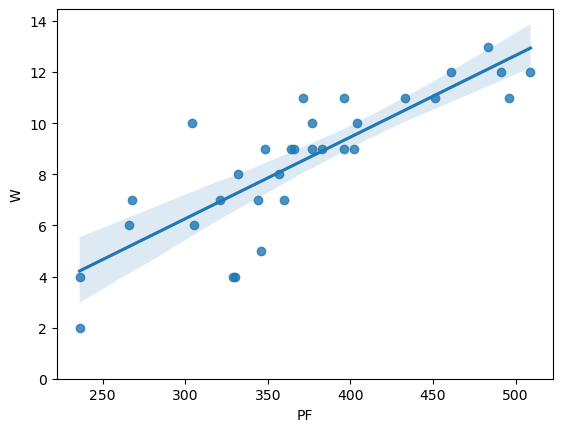

In [29]:
#Postive linear relationship b/w PF(points for) and W (wins)
sns.regplot(x='PF',y='W',data=all_df)
plt.ylim(0,)

(0.0, 13.55)

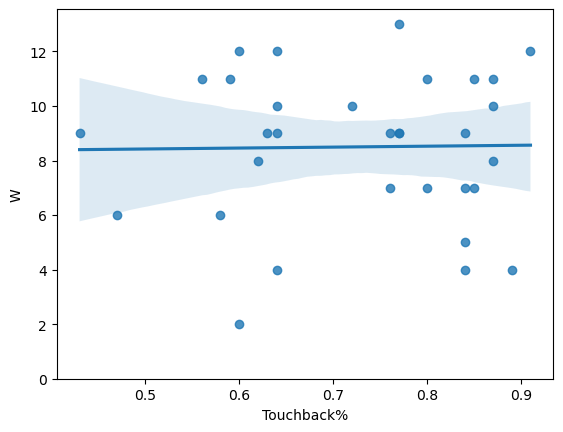

In [30]:
#Weak linear relationship b/w Touchback% and W (wins)
sns.regplot(x='Touchback%',y='W',data=all_df)
plt.ylim(0,)

(0.0, 14.72023452234003)

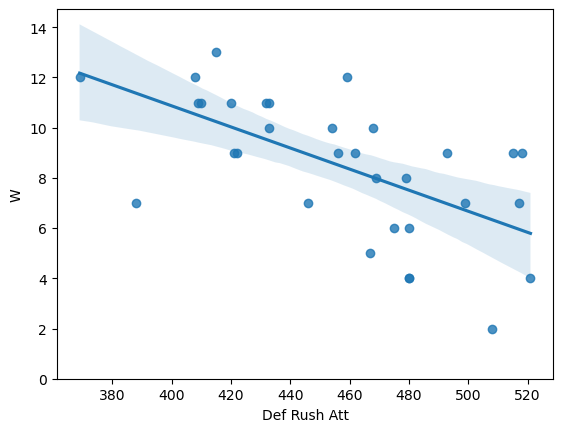

In [31]:
#Negative linear relationship b/w Def Rush Att and W (wins)
sns.regplot(x='Def Rush Att',y='W',data=all_df)
plt.ylim(0,)

In [32]:
#Pearson correlation and p_value for PF and W
pearson_coef, p_value = stats.pearsonr(all_df['PF'],all_df['W'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8358110778343659  with a P-value of P = 2.6275326315135766e-09


In [33]:
#Pearson correlation and p_value for Touchback% and W
pearson_coef, p_value = stats.pearsonr(all_df['Touchback%'],all_df['W'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.016207768239229828  with a P-value of P = 0.9298426340478203


In [34]:
 #Pearson correlation and p_value for Def Rush Att and W
pearson_coef, p_value = stats.pearsonr(all_df['Def Rush Att'],all_df['W'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6150390754926844  with a P-value of P = 0.00017978381242554902


Model Development

In [35]:
#Linear Regression Model

X = all_df[['PF']]
Y = all_df['W']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.6985801578306445

In [36]:
#Multiple Linear Regression 

features = ['PF','Off Pass NY/A','Yds Gained','XPM','Off Y/P','All Purpose Yds','Tot 1stD Gained','Pass Yds Gained','Pass TD','Rush TD','Pass 1stD','Takeaways','PA','Def Rush Att','Off Rank','Def Rank','Kicking Rank']

X2 = all_df[features]
Y2 = all_df['W']
lm.fit(X2,Y2)
lm.score(X2,Y2)

0.8734818768428411

Model Evaluation Using Visualization


(0.0, 14.416499618773747)

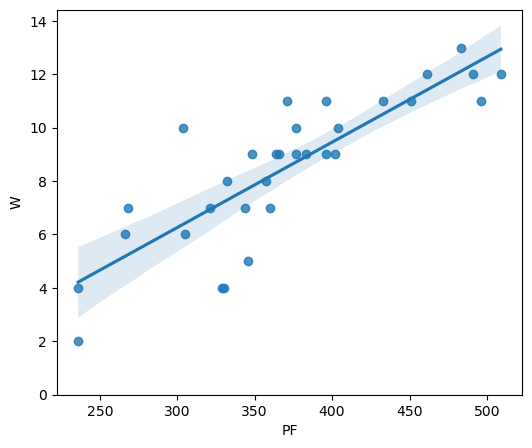

In [37]:
#Regression Plot (SLR)

width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="PF", y="W", data=all_df)
plt.ylim(0,)

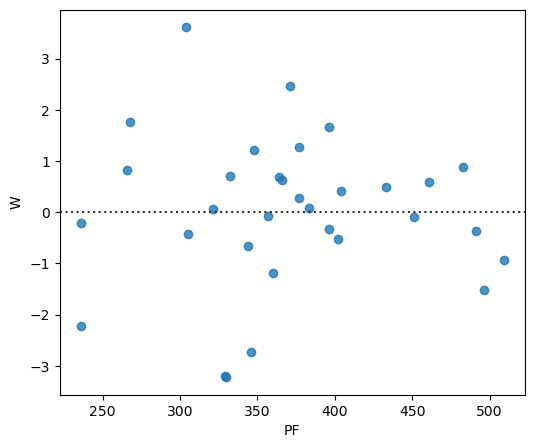

In [38]:
#Residual Plot (SLR)

width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=all_df['PF'], y=all_df['W'])
plt.show()

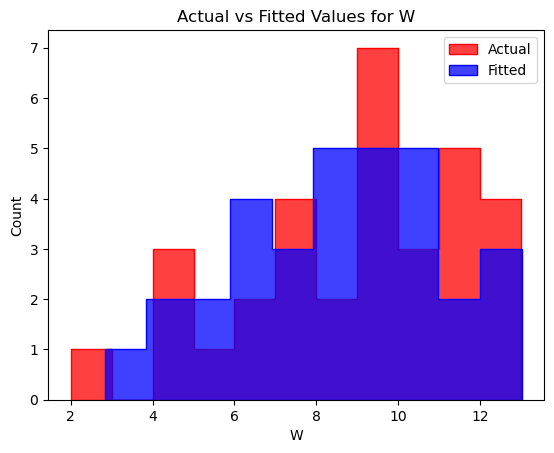

In [39]:
#Distribution Plot (MLR)

Y_hat = lm.predict(X2)

ax1 = sns.histplot(all_df['W'], color='r',element='step',label='Actual', binwidth=1)
sns.histplot(Y_hat, color='b',binwidth=1,element='step',label='Fitted', ax=ax1)

plt.title('Actual vs Fitted Values for W')
plt.legend()
plt.show()


Measures for In-Sample Evaluation

In [40]:
#Simple Linear Regression
#R^2

lm.fit(X,Y) #fit the model
print('The R-square is: ', lm.score(X,Y)) #find R^2

#We can say that ~69.858% of the variation of the price is explained by this simple linear model "PF"


The R-square is:  0.6985801578306445


In [41]:
#Mean Squared Error (MSE)

Yhat=lm.predict(X)
mse = mean_squared_error(all_df['W'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  2.2041325958634124


In [42]:
#Multiple Linear Regression
#R^2
lm.fit(X2,all_df['W']) #fit the model
print('The R-square is: ', lm.score(X2, all_df['W'])) #find R^2

The R-square is:  0.8734818768428411


In [43]:
#Mean Squared Error

Yhat_multifit=lm.predict(X2)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(all_df['W'], Yhat_multifit))

The mean square error of price and predicted value using multifit is:  0.9251637755867247


Model Evaluation & Refinement

In [44]:
#Training and Testing

y_data = all_df['W']
x_data = all_df[features]


In [45]:
#Split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 7
number of training samples: 25


In [46]:
#Test & Training data R^2

lre = LinearRegression()
lre.fit(x_train[features],y_train)
lre.score(x_test[features],y_test)
lre.score(x_train[features],y_train)
print('Test data R^2: ', lre.score(x_test[features],y_test))
print('Training data R^2: ', lre.score(x_train[features],y_train))

Test data R^2:  0.47066149038831107
Training data R^2:  0.9048014603925618


Cross-Validation Score


In [47]:
Rcross = cross_val_score(lre, x_data[features], y_data, cv=4)
print('Avg R^2 value for each fold:',Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

Avg R^2 value for each fold: [ 0.20461739 -2.46444841  0.1537678  -6.58405671]
The mean of the folds are -2.172529981203707 and the standard deviation is 2.7662824999901314


Overfitting, Underfitting, and Model Selection

In [48]:
lr = LinearRegression()
lr.fit(x_train[features], y_train)

LinearRegression()

In [49]:
#Prediction using training data

yhat_train = lr.predict(x_train[features])
yhat_train[0:5]

array([ 8.25062198, 11.74923787, 10.55839227,  5.96494711, 10.67179145])

In [50]:
#Prediction using test data

yhat_test = lr.predict(x_test[features])
yhat_test[0:5]

array([14.67179203, 13.48256582, 11.59229456, 11.40934084,  5.28082754])

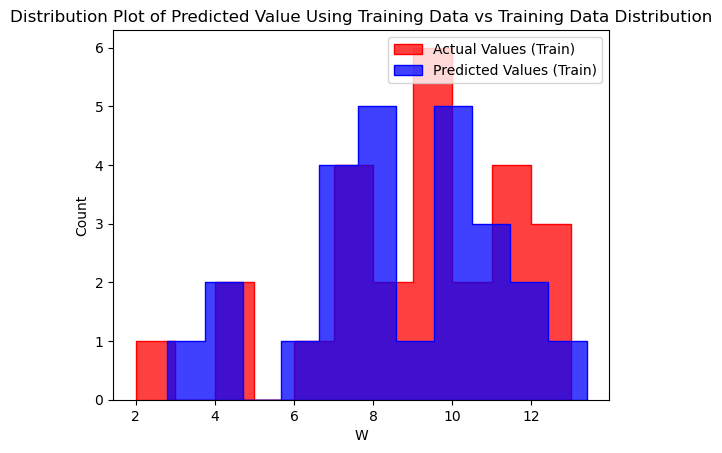

In [51]:
#Plot of predicted values using the training data compared to the actual values of the training data.

ax2 = sns.histplot(y_train, color='r', element='step',label='Actual Values (Train)', binwidth=1, )
sns.histplot(yhat_train, color='b', element='step',label='Predicted Values (Train)',binwidth=1, ax=ax2)

plt.title('Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution')
plt.legend()
plt.show()


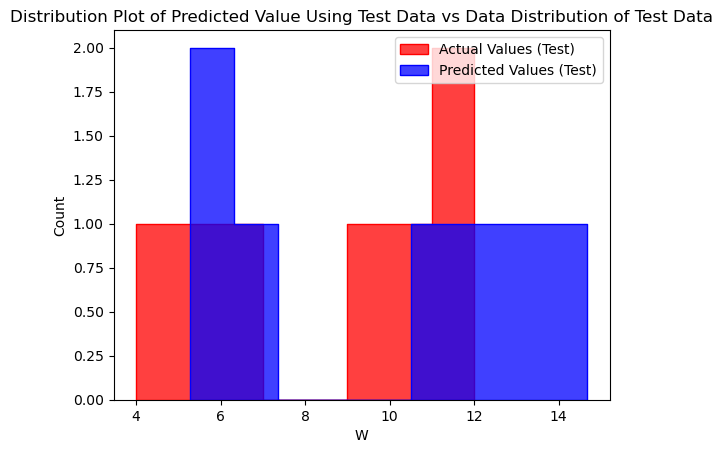

In [52]:
#Plot of predicted value using the test data compared to the actual values of the test data

ax3 = sns.histplot(y_test, color='r', element='step',label='Actual Values (Test)', binwidth=1)
sns.histplot(yhat_test, color='b', element='step',label='Predicted Values (Test)',binwidth=1, ax=ax3)

plt.title('Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data')
plt.legend()
plt.show()

In [53]:
#Ridge Regression

RidgeModel = Ridge(alpha=1) 
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)


0.5037103178033948

In [54]:
#Minimize test error

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train, y_train)
    test_score, train_score = RigeModel.score(x_test, y_test), RigeModel.score(x_train, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.654, Train Score=0.896]

100%|██████████| 1000/1000 [00:03<00:00, 258.25it/s, Test Score=0.698, Train Score=0.84]


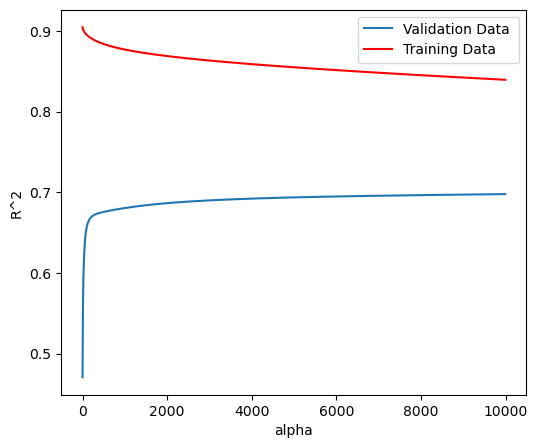

In [55]:
#Plot R^2 for different alpha values

width = 6
height = 5
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='Validation Data ')
plt.plot(Alpha,Rsqu_train, 'r', label='Training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [56]:
#Grid Search

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}] #Dictionary of paramater values
RR = Ridge() #Ridge regression object
Grid1 = GridSearchCV(RR, parameters1,cv=4) #Ridge grid search object

Grid1.fit(x_data[features], y_data) #Fit the model
BestRR=Grid1.best_estimator_ #Obtain estimator with best paramaters & assign to 'BestRR'
print(BestRR)

Ridge(alpha=10000)


In [57]:
#Test model on test data

BestRR.score(x_test[features], y_test)

0.7979803256519951